In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [2]:
loan_data=pd.read_csv('../data/loan/train_loan.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan=loan_data.copy()

In [5]:
loan_data=loan_data.dropna()

In [6]:
# #Pract-2 Read a dataset. Perform descriptive analysis and identify the data type on loan
# dataset.

loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
type(loan_data)

pandas.core.frame.DataFrame

In [8]:
#Pract-3:Consider loan dataset. Plot the graph showing number of male and female
# candidates.

loan_gender=loan_data.groupby('Gender')['Gender'].count().to_frame()

In [9]:
loan_gender

,Gender
Gender,
Female,86
Male,394


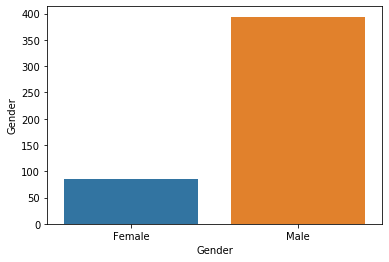

In [10]:
sns.barplot(loan_gender.index,loan_gender['Gender'])

In [11]:
#prac:-4  Consider loan dataset and give answer of maximum which age of people are taking
# loan? Show with the help of any plot in python.

loan_data['Age']=np.random.randint(0,48,len(loan_data))

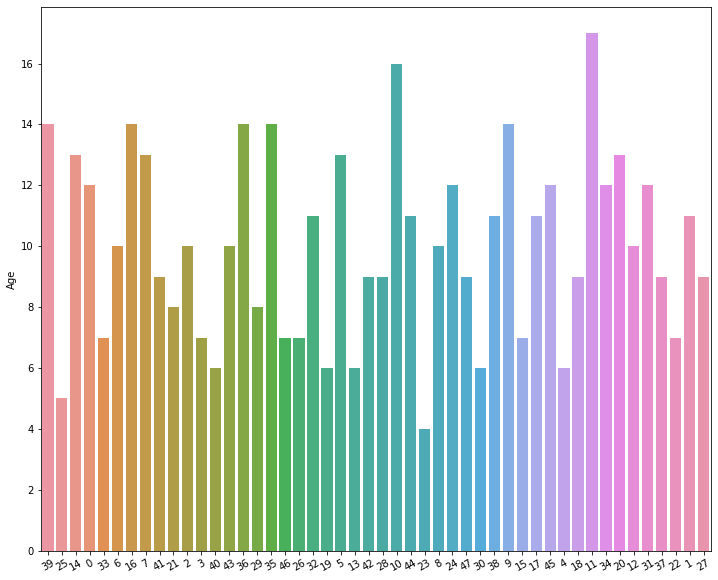

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(loan_data['Age'].unique(),loan_data['Age'].value_counts()).set_xticklabels(loan_data.Age.unique(),rotation=30)
plt.show()

In [13]:
#prcat:-5  Consider drug data set. Plot a graph showing which drug is useful for normal blood
# pressure
Drug=pd.read_csv("../data/Drug/drug200.csv")

In [14]:
Drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [15]:
df=pd.crosstab(Drug['BP'],Drug['Drug'])
df

Drug,DrugY,drugA,drugB,drugC,drugX
BP,,,,,
HIGH,38,23,16,0,0
LOW,30,0,0,16,18
NORMAL,23,0,0,0,36


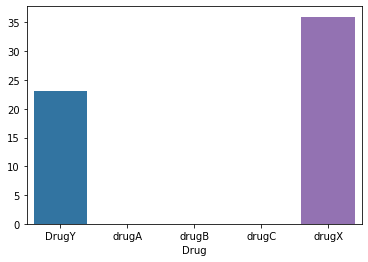

In [17]:
l1=list(df.loc['NORMAL',:].values)

sns.barplot(df.columns,l1)

In [18]:
#Prac:6-Implement a method to treat missing value for a variable
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


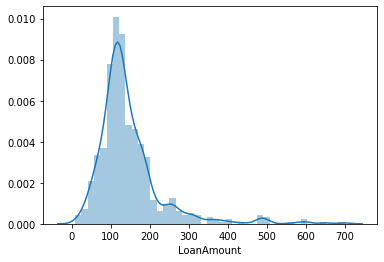

In [19]:
sns.distplot(loan['LoanAmount'])

In [20]:
#why median because here data skewed
loan['LoanAmount'].fillna(loan['LoanAmount'].median(),inplace=True)

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
# Pract-7: Implement a method using regular expression to validate email id and mobile number in the loan data set
# Python program to validate an Email

import re

regex = '^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'


def check(email):

    if(re.search(regex, email)):
        print("Valid Email")

    else:
        print("Invalid Email")


email = "ankitrai326@gmail.com"
check(email)
email = "my.ownsite@ourearth.org"
check(email)
email = "ankitrai326.com"
check(email)



def isValid(s):
    Pattern = re.compile("(0/91)?[7-9][0-9]{9}")
    return Pattern.match(s)


s = "347873923408"
if (isValid(s)):
    print("Valid Number")
else:
    print("Invalid Number")



Valid Email
Valid Email
Invalid Email
Invalid Number


In [8]:
#Pract-8: Implement a method using XPath to fetch text description of slider images of any website home page- ldce/gtu.
import requests  as rq
from lxml import html

url = "https://www.gtu.ac.in/"
resp = rq.get(url)
tree = html.fromstring(resp.content)
elments = tree.xpath("""//body/form[@id='form1']/div[@id='outer-wrapper']/div[@id='sliderhide']/div[@id='banner']/div[@id='Slider']/div[@id='amazingcarousel-container-1']/div[@id='amazingcarousel-1']/div[1]/ul[1]/li[*]/div[*]/div[2]""")

for element in elments:
    print(element.text)



                                            GTU organizes Dr. APJ Abdul Kalam Memorial lecture on 15th October 2020
                                            
                                        

                                            GTU has organized ONLINE ORIENTATION MEET for newly admitted 1st Semester BE students on 15th October 2020
                                            
                                        

                                            Hon'ble Deputy CM Shri Nitinbhai Patel appreciates GTU-GIC's Startup, solved the COVID challenges & developing innovative products
                                            
                                        

                                            GTU has established Central Research Facilities & Inaugurated Unique Model of HPTLC-MS instrument Facility at GSP on 1st Sept.
                                            
                                        

                                      

In [24]:
#Pract-9: Implement bag of word model for the given documents.
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize


dt =["I'm selfish, impatient and a little insecure. I make m:"]
print (dt)
print(word_tokenize(dt[0]))

["I'm selfish, impatient and a little insecure. I make m:"]
['I', "'m", 'selfish', ',', 'impatient', 'and', 'a', 'little', 'insecure', '.', 'I', 'make', 'm', ':']


In [25]:
# Pract-10: Implement TF-IDF model for the given documents
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
        'This is the first document.',
         'This document is the second document.',
         'And this is the third one.',
       'Is this the first document?',
        ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)
(4, 9)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


(4, 9)

In [26]:
#Pract-11: Draw graph for the given list of nodes and edges using NetworkX.
import networkx as nx
G = nx.Graph() 

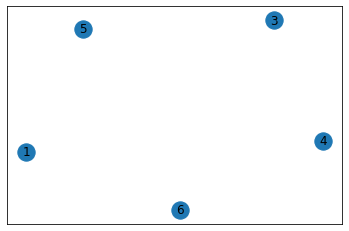

In [27]:
l1=[1,3,4,5,6]
G.add_nodes_from(l1)
nx.draw_networkx(G, with_label = True)

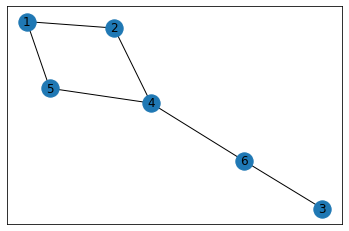

In [28]:
l2=[(1,2),(1,5),(4,2),(3,6),(5,4),(4,6)]
G.add_edges_from(l2)
nx.draw_networkx(G,with_labels=True)

In [29]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,39
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,25
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,14
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,33


In [30]:
#Pract-12: Plot the following graph for the loan datasets using pyplot of matplotlib library and
#compare with respect to the applicability of graph.

In [31]:
#A. Pie chart – Plot percentage of applicant according to city/state/country
m=loan_data['Property_Area'].value_counts()
m.values

array([191, 150, 139], dtype=int64)

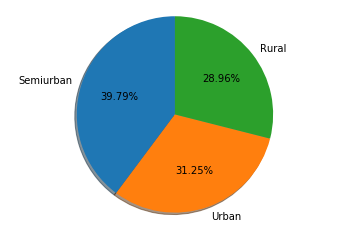

In [32]:
labels = m.index
sizes = m.values
 # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [33]:
len(loan_data)

480

In [34]:
#B. Bar chart – Plot the percentage of male/female applicants in the different month/year for comparison
import random 
import calendar
l1=[]
for month_idx in range(0 ,13):
   
    l1.append(calendar.month_abbr[month_idx])
l2=[]
for j in range(len(loan_data)):
    l2.append(l1[np.random.randint(1,12)])

loan_data['month']=l2

In [35]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age,month
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,39,Oct
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,25,May
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,14,Apr
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,Jul
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,33,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,12,Mar
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,47,Feb
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2,Nov
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,38,Feb


In [36]:
df=loan_data.loc[:,['month','Gender']]
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
df=df[df['Gender']=='Male']

In [39]:
total=df['Gender'].count()

In [40]:
total

394

In [41]:
df

,month,Gender
1,Oct,Male
2,May,Male
3,Apr,Male
4,Jul,Male
5,Mar,Male
...,...,...
607,Sep,Male
608,Jun,Male
610,Feb,Male
611,Nov,Male


In [42]:
df.columns

Index(['month', 'Gender'], dtype='object')

In [43]:
df=df.groupby(['month'],as_index=False)['Gender'].count()

In [44]:
df=df.sort_values(by='Gender',ascending=False)

In [45]:
df['p_male']=round(df['Gender'].div(total)*100,2)

Text(0, 0.5, 'Percentage')

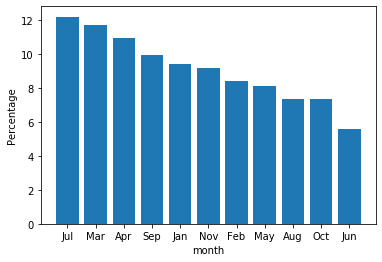

In [46]:
plt.bar(df['month'],df['p_male'])
plt.xlabel('month')
plt.ylabel('Percentage')

In [47]:
#C. Histograms – Plot the applicant with respect to their monthly/annually income. 

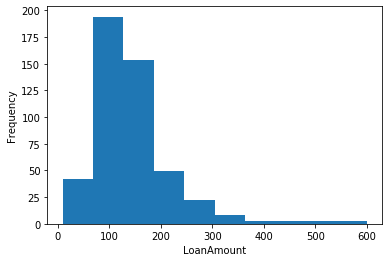

In [48]:
plt.hist(loan_data['LoanAmount'])
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

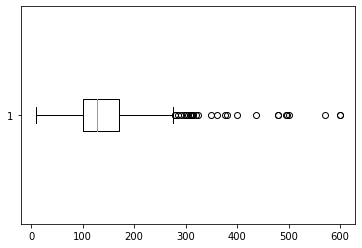

In [49]:
#D. Boxplot – Plot this with respect to the loan amount
plt.boxplot(loan_data['LoanAmount'],vert=False)
plt.show()

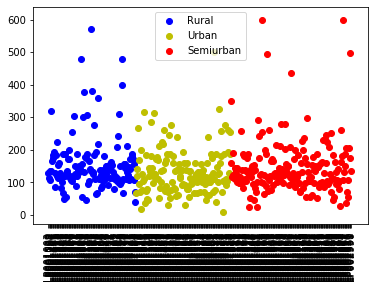

In [52]:
#Scatterplot – Plot this with respect to location and loan amount of applicant and
#group them accordingly.


x=loan_data['Property_Area'].unique()
color=['b','y','r']

for i,j in zip(x,color):
    df1=loan_data.loc[loan_data['Property_Area']==i]
    plt.scatter(df1['Loan_ID'],df1['LoanAmount'],c=j)
    
    plt.xticks(rotation=90)
plt.legend(x)
plt.show()



In [53]:
#Pract-13: Plot the time series along with trendline on the loan datasets for displaying the loan
#of one year of the data.
time=np.arange(0,365,5)
time

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360])

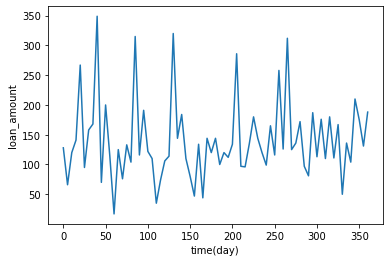

In [54]:
plt.plot(time,loan_data['LoanAmount'][:len(time)])
plt.xlabel('time(day)')
plt.ylabel('loan_amount')
plt.show()

C:\Users\nikhil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


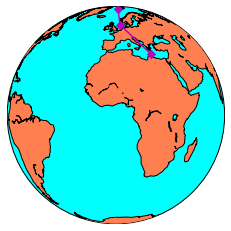

In [55]:
# Pract-14: Plot the geographic data using the basemap
%matplotlib inline
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()
l1=[23,4,5]
l2=[34,56,78]
x, y = map(l1, l2)

map.plot(x, y, marker='D',color='m')

plt.show()


In [56]:
# Pract-15: Implement descriptive statistics of numerical and categorical attributes of the loan
# data sets.

In [57]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age,month
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,39,Oct
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,25,May
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,14,Apr
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,Jul
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,33,Mar


In [58]:
loan_data.groupby(['Self_Employed']).agg({'LoanAmount':['mean','std','median']})

LoanAmount                  
                     mean        std median
Self_Employed                              
No             140.869565  76.418767  125.5
Yes            168.984848  99.832397  150.0

In [59]:
loan_data.groupby(['Married']).agg({'LoanAmount':['mean','std','median']})

LoanAmount                  
               mean        std median
Married                              
No       124.721893  63.341851  115.0
Yes      155.610932  86.623880  133.0

In [60]:
loan_data.groupby(['Education']).agg({'LoanAmount':['mean','std','median']})

LoanAmount                  
                    mean        std median
Education                                 
Graduate      151.728460  86.230753  132.0
Not Graduate  117.123711  42.270522  113.0

In [61]:
loan_data.groupby(['month']).agg({'LoanAmount':['mean','std','median']})

LoanAmount                   
             mean         std median
month                               
Apr    151.641509   91.496342  124.0
Aug    167.314286   92.160592  152.0
Feb    155.071429  110.720565  132.5
Jan    139.586957   60.317890  123.0
Jul    146.000000   67.142725  127.5
Jun    127.307692   36.465621  124.5
Mar    132.142857   62.327414  130.0
May    135.416667   70.580602  112.0
Nov    158.755556  118.346209  128.0
Oct    140.432432   77.831920  130.0
Sep    136.354167   56.813802  128.5

In [62]:
loan_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.049692
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.015613
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.022438
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.019621
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.089081
Age,-0.049692,0.015613,-0.022438,-0.019621,-0.089081,1.000000
